In [1]:
import numpy as np
import json

In [2]:
import sys
import pathlib
sys.path.append(pathlib.Path().absolute().parent.as_posix())

In [3]:
from functions.dynamics_functions import psi_function 
from functions.trajectories import *
from functions.set_objects_from_data import *
from functions.plot_functions import *

from classes.EmpData import Data


## Set final year

In [4]:
T = 2050

# A: regular and occasional speakers

## A1: Full sample

### Version 1:  Start at 1998 with estimated numbers
* Constant model
* relative migration

In [5]:
# set parameters
# set parameters
with open("data/parameters_1998.json", "r") as file: # 2014 and 1998 parameters are identical
    params = json.load(file) 

with open("data/data_1998.json", "r") as file:
    data = json.load(file)


parameters_1998 = get_params(params)
data_1998 = get_emp_data(data)

In [6]:
parameters_1998.print_params()

lam = 0.008
mu = 0.011

nu = 0.0066
m_H = 1
m_L = 0
m_B = 0

C1 = 0.5
C2 = 0

q = 
[[1.    0.45  0.    0.    0.074]
 [0.    0.    1.    1.    0.   ]
 [0.    0.55  0.    0.    0.926]]

sHB = 0
sBH = 0
sLB = 0
sLH = 0

a_LB = 0
a_HB = 0
a_BL = 0
a_BH = 0


In [7]:
data_1998.print_data()

xH =
[0.316 0.396]
xL =
[0 0]
xB =
[0.684 0.604]
years
[1998 2014]


In [8]:
traj_1998 = trajectory(T, parameters_1998, data_1998)

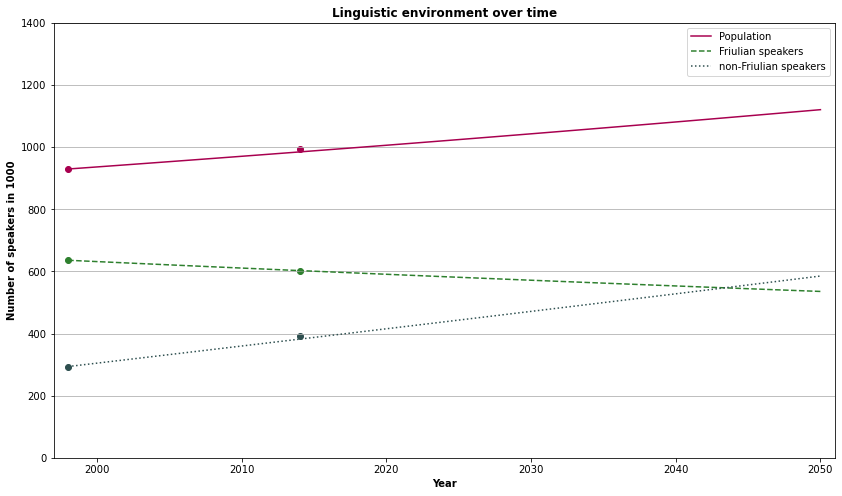

In [9]:
# Absolute numbers
plot_trajectory(traj_1998, 
                data_1998,
                "Friulian",
                y_scaling = 1000, 
                y_lim = 1400000,
                fname="plots/full_absolute_1998.png")

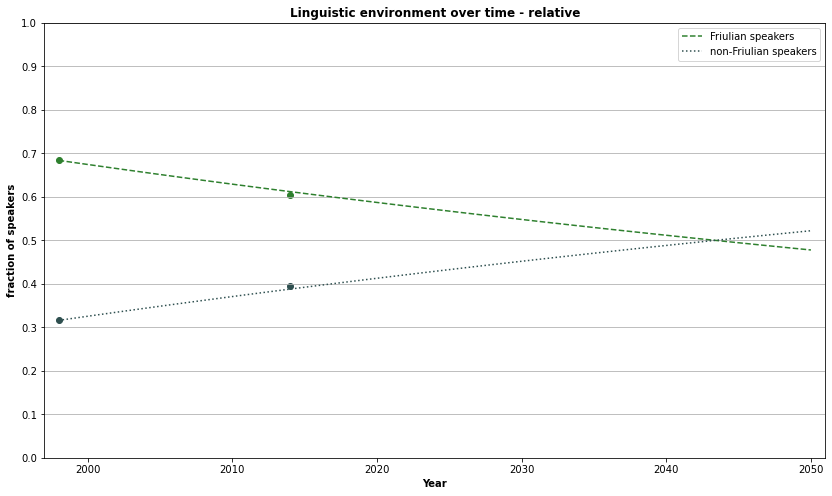

In [10]:
plot_trajectory_relative(traj_1998, data_1998,"Friulian",fname="plots/full_relative_1998.png")

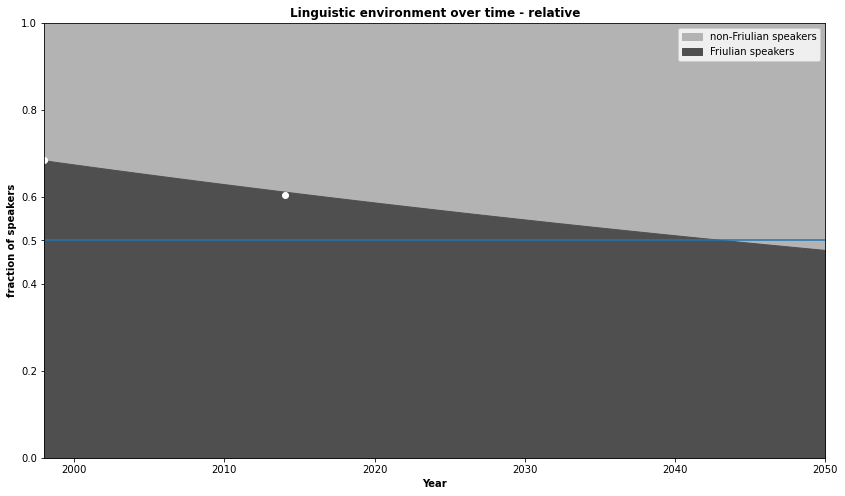

In [11]:
plot_trajectory_relative_fill(traj_1998, 
                              data_1998,
                              "Friulian",
                              fname="plots/full_relative_fill_1998.png")

### Version 2: Start at 2014

In [12]:
# set parameters
with open("data/parameters_2014.json", "r") as file: # 2014 and 1998 parameters are identical
    params = json.load(file) 


with open("data/data_2014.json", "r") as file:
    data_full_2014 = json.load(file)

data_2014 = get_emp_data(data_full_2014)
parameters_2014 = get_params(params)

In [ ]:
traj_2014 = trajectory(T, parameters_2014, data_2014)

In [ ]:
plot_trajectory(traj_2014, 
                data_2014, 
                "Friulian",
                y_scaling = 1000, 
                y_lim = 1400000,
                fname="plots/full_absolute_2014.png")

In [ ]:
plot_trajectory_relative(traj_2014, 
                         data_2014,
                         "Friulian",
                         fname="plots/full_relative_2014.png")

In [ ]:
plot_trajectory_relative_fill(traj_2014, 
                              data_2014,
                              "Friulian",
                              fname="plots/full_relative_fill_2014.png")

## A2: Old sample

In [ ]:
# set parameters
   
with open("data/data_old.json", "r") as file:
    data = json.load(file)
    
data_old = get_emp_data(data)

In [ ]:
data_old.print_data()

**relative**

In [ ]:
traj_old = trajectory_rel(T, parameters_1998, data_old)

In [ ]:
plot_trajectory_relative(traj_old, 
                         data_old,
                         "Friulian",
                         fname="plots/old_relative_all.png")

In [ ]:
plot_trajectory_relative_fill(traj_old, 
                              data_old,
                              "Friulian",
                              fname="plots/old_relative_filled_all.png")

## A3: Comparison of the models at final time

In [ ]:
traj_1998_end = np.array(traj_1998[1:,-1])
traj_1998_end_rel = traj_1998_end/sum(traj_1998_end)

traj_2014_end = np.array(traj_2014[1:,-1])
traj_2014_end_rel = traj_2014_end/sum(traj_2014_end)

traj_2014_start = np.array(traj_2014[1:,0])
traj_2014_start_rel = traj_2014_start/sum(traj_2014_start)


traj_old_end_rel = np.array(traj_old[1:,-1])

In [ ]:
traj_2014[:,16]

In [ ]:
print("2014")
print(f"   N = {traj_2014_start[0]+traj_2014_start[2] :0.0f}")
print(f"   NB = {traj_2014_start[2] :0.0f}")
print(f"   NH = {traj_2014_start[0] :0.0f}")
print(f"   xB = {traj_2014_start_rel[2] :0.3f}")
print(f"   xH = {traj_2014_start_rel[0] :0.3f}")


print("")
print(f"Full sample, start 1998")
print("")
print(" 2030")
print(f"   NB = {traj_1998[3,32] :0.0f}")
print(f"   NH = {traj_1998[1,32] :0.0f}")

print("")
print(f" {T}")
print(f"   N = {traj_1998_end[0]+traj_1998_end[2] :0.0f}")
print(f"   NB = {traj_1998_end[2] :0.0f}")
print(f"   NH = {traj_1998_end[0] :0.0f}")
print(f"   xB = {traj_1998_end_rel[2] :0.3f}")
print(f"   xH = {traj_1998_end_rel[0] :0.3f}")



print("")
print(f"Full sample, start 2014")
print("")
print(" 2030")
print(f"   NB = {traj_2014[3,16] :0.0f}")
print(f"   NH = {traj_2014[1,16] :0.0f}")

print("")
print(f" {T}")
print(f"   N = {traj_2014_end[0]+traj_2014_end[2] :0.0f}")
print(f"   NB = {traj_2014_end[2] :0.0f}")
print(f"   NH = {traj_2014_end[0] :0.0f}")
print(f"   xB = {traj_2014_end_rel[2] :0.3f}")
print(f"   xH = {traj_2014_end_rel[0] :0.3f}")

print("")
print(f" Old sample")
print(f"   xB = {traj_old_end_rel[2] :0.3f}")
print(f"   xH = {traj_old_end_rel[0] :0.3f}")





**adjusting projection from "old sample" with 1998, 2014 data**

In [ ]:
print("")
print(f" Version old - adjusted with empirical fraction from 1998")
print(f"   xB = {traj_old_end_rel[2]*data_1998.Rel.xB[0]/data_old.Rel.xB[1]}")
print(f"   xH = {1-traj_old_end_rel[2]*data_1998.Rel.xB[0]/data_old.Rel.xB[1]}")

print("")
print(f" Version old - adjusted with empirical fraction from 2014")
print(f"   xB = {traj_old_end_rel[2]*data_2014.Rel.xB[0]/data_old.Rel.xB[1]}")
print(f"   xH = {1-traj_old_end_rel[2]*data_2014.Rel.xB[0]/data_old.Rel.xB[1]}")

## A4: Analysis for individual provinces

### Udine

In [ ]:
# set parameters
with open("data/data_udine_2014.json", "r") as file:
    data_udine_2014 = json.load(file)

data_udine = get_emp_data(data_udine_2014)

traj_udine = trajectory(T, parameters_2014, data_udine)

In [ ]:
plot_trajectory(traj_udine, 
                data_udine,
                "Friulian",
                y_scaling = 1000, 
                y_lim = 700000,
                fname = "plots/absolute_udine.png")

### Pordenone

In [ ]:
# set parameters
with open("data/data_pordenone_2014.json", "r") as file:
    data_pordenone_2014 = json.load(file)

data_pordenone = get_emp_data(data_pordenone_2014)

traj_pordenone = trajectory(T, parameters_2014, data_pordenone)

In [ ]:
plot_trajectory(traj_pordenone,
                data_pordenone,
                "Friulian",
                y_scaling = 1000,
                y_lim = 700000,
                fname = "plots/absolute_pordenone.png")

### Gorizia

In [ ]:
# set parameters
with open("data/data_gorizia_2014.json", "r") as file:
    data_gorizia_2014 = json.load(file)

data_gorizia = get_emp_data(data_gorizia_2014)

traj_gorizia = trajectory(T, parameters_2014, data_gorizia)

In [ ]:
plot_trajectory(traj_gorizia, 
                data_gorizia,
                "Friulian",
                y_scaling = 1000,
                y_lim = 700000,
                fname = "plots/absolute_gorizia.png")

### Comparison

In [ ]:
udine_start  = np.array(traj_udine[1:,0])
udine_end = np.array(traj_udine[1:,-1])

pordenone_start  = np.array(traj_pordenone[1:,0])
pordenone_end = np.array(traj_pordenone[1:,-1])

gorizia_start = np.array(traj_gorizia[1:,0])
gorizia_end = np.array(traj_gorizia[1:,-1])

total_start = udine_start + pordenone_start + gorizia_start
total_end = udine_end + pordenone_end + gorizia_end


In [ ]:
print("")
print("Udine")
print("  2014")
print(f"   N = {udine_start[2]+udine_start[0] :0.0f}")
print(f"   NB = {udine_start[2] :0.0f}")
print(f"   NH = {udine_start[0] :0.0f}")
print(f"   xB = {udine_start[2]/(udine_start[0]+udine_start[2]) :0.3f}")
print(f"   xH = {udine_start[0]/(udine_start[0]+udine_start[2]) :0.3f}")
print("")
print(f"  {T}")
print(f"   N = {udine_end[2]+udine_end[0] :0.0f}")
print(f"   NB = {udine_end[2] :0.0f}")
print(f"   NH = {udine_end[0] :0.0f}")
print(f"   xB = {udine_end[2]/(udine_end[0]+udine_end[2]) :0.3f}")
print(f"   xH = {udine_end[0]/(udine_end[0]+udine_end[2]) :0.3f}")

In [ ]:
print("pordenone")
print("  2014")
print(f"   N = {pordenone_start[2]+pordenone_start[0] :0.0f}")
print(f"   NB = {pordenone_start[2] :0.0f}")
print(f"   NH = {pordenone_start[0] :0.0f}")
print(f"   xB = {pordenone_start[2]/(pordenone_start[0]+pordenone_start[2]) :0.3f}")
print(f"   xH = {pordenone_start[0]/(pordenone_start[0]+pordenone_start[2]) :0.3f}")
print("")
print(f"  {T}")
print(f"   N = {pordenone_end[2]+pordenone_end[0] :0.0f}")
print(f"   NB = {pordenone_end[2] :0.0f}")
print(f"   NH = {pordenone_end[0] :0.0f}")
print(f"   xB = {pordenone_end[2]/(pordenone_end[0]+pordenone_end[2]) :0.3f}")
print(f"   xH = {pordenone_end[0]/(pordenone_end[0]+pordenone_end[2]) :0.3f}")

In [ ]:
print("gorizia")
print("  2014")
print(f"   N = {gorizia_start[2]+gorizia_start[0] :0.0f}")
print(f"   NB = {gorizia_start[2] :0.0f}")
print(f"   NH = {gorizia_start[0] :0.0f}")
print(f"   xB = {gorizia_start[2]/(gorizia_start[0]+gorizia_start[2]) :0.3f}")
print(f"   xH = {gorizia_start[0]/(gorizia_start[0]+gorizia_start[2]) :0.3f}")
print("")
print(f"  {T}")
print(f"   N = {gorizia_end[2]+gorizia_end[0] :0.0f}")
print(f"   NB = {gorizia_end[2] :0.0f}")
print(f"   NH = {gorizia_end[0] :0.0f}")
print(f"   xB = {gorizia_end[2]/(gorizia_end[0]+gorizia_end[2]) :0.3f}")
print(f"   xH = {gorizia_end[0]/(gorizia_end[0]+gorizia_end[2]) :0.3f}")

In [ ]:
print("TOTAL")
print("  2014")
print(f"   N = {total_start[0]+total_start[2] :0.0f}")
print(f"   NB = {total_start[2] :0.0f}")
print(f"   NH = {total_start[0] :0.0f}")
print(f"   xB = {total_start[2]/(total_start[0]+total_start[2]) :0.3f}")
print(f"   xH = {total_start[0]/(total_start[0]+total_start[2]) :0.3f}")
print("")
print(f"  {T}")
print(f"   N = {total_end[2]+total_end[0] :0.0f}")
print(f"   NB = {total_end[2] :0.0f}")
print(f"   NH = {total_end[0] :0.0f}")
print(f"   xB = {total_end[2]/(total_end[0]+total_end[2]) :0.3f}")
print(f"   xH = {total_end[0]/(total_end[0]+total_end[2]) :0.3f}")

# B: Only regular speakers

## B1: Full sample

In [ ]:
# set parameters
# set parameters
with open("data/parameters_regular.json", "r") as file:
    params = json.load(file) 

with open("data/data_1998_regular.json", "r") as file:
    data = json.load(file)


parameters_regular = get_params(params)
data_1998_regular = get_emp_data(data)

In [ ]:
parameters_regular.print_params()

In [ ]:
parameters_regular.q.q_mat

In [ ]:
############### WIEDER RAUS WERFEN

parameters_regular.C.C1=0.5;
parameters_regular.q.q_mat = [[1.0, 1.0, 0.0, 0.0, 0.11],
                             [0.0, 0.0, 1.0, 1.0, 0.0],
                             [0.0, 0.0, 0.0, 0.0, 0.89]
                            ]

# argument:rates dropped from 1977 to 1998

In [ ]:
traj_1998_regular = trajectory(T, parameters_regular, data_1998_regular)

In [ ]:
# Absolute numbers
plot_trajectory(traj_1998_regular, 
                data_1998_regular,
                "regular Friulian",
                y_scaling = 1000, 
                y_lim = 1400000,
                fname="plots/full_absolute_1998_regular.png")

In [ ]:
plot_trajectory_relative(traj_1998_regular, 
                         data_1998_regular,
                         "Friulian",
                         fname="plots/full_relative_1998_regular.png")

In [ ]:
plot_trajectory_relative_fill(traj_1998_regular, 
                              data_1998_regular,
                              "regular Friulian",
                              fname="plots/full_relative_fill_1998_regular.png")

## B2: Old sample

In [ ]:
# set parameters
# set parameters
with open("data/parameters_regular.json", "r") as file:
    param_old = json.load(file)
    
with open("data/data_old_regular.json", "r") as file:
    data = json.load(file)
    

parameters_old_regular = get_params(param_old)
data_old_regular = get_emp_data(data)

In [ ]:
data_old_regular.print_data()
parameters_old_regular.print_params()

## KRAMS -- Raus

In [ ]:
parameters_old_regular.q.q_mat = [[1.0, 1.0, 0.0, 0.0, 0.35],
                                  [0.0, 0.0, 1.0, 1.0, 0.0],
                                  [0.0, 0.0, 0.0, 0.0, 0.65]
                            ]
# 

In [ ]:
data_old_regular.Rel.xB = [.77, .57, .48]
data_old_regular.Rel.xH = [.23, .43, .52]

In [ ]:
parameters_old_regular.a.a_BH = 0.000; 

In [ ]:
parameters_old_regular.pop.lam = 0.0137
parameters_old_regular.pop.mu = 0.0098
parameters_old_regular.mig_rel.nu = 0.0066

In [ ]:
T=2050

In [ ]:
traj_old_regular = trajectory_rel(T, parameters_old_regular, data_old_regular)

In [ ]:
plot_trajectory_relative(traj_old_regular, 
                         data_old_regular,
                         "regular Friulian",
                         fname="plots/old_relative_regular.png")

In [ ]:
plot_trajectory_relative_fill(traj_old_regular, 
                              data_old_regular,
                              "regular Friulian",
                              fname="plots/old_relative_filled_regular.png")